##Example: US States Data

In [101]:
import pandas as pd
import numpy as np

In [102]:
abbre = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-abbrevs.csv')
pop = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-population.csv')
areas = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-USstates/master/state-areas.csv')

print(abbre.head()); print(pop.head()); print(areas.head())

        state abbreviation
0     Alabama           AL
1      Alaska           AK
2     Arizona           AZ
3    Arkansas           AR
4  California           CA
  state/region     ages  year  population
0           AL  under18  2012   1117489.0
1           AL    total  2012   4817528.0
2           AL  under18  2010   1130966.0
3           AL    total  2010   4785570.0
4           AL  under18  2011   1125763.0
        state  area (sq. mi)
0     Alabama          52423
1      Alaska         656425
2     Arizona         114006
3    Arkansas          53182
4  California         163707


In [103]:
merged = pd.merge(pop, abbre, how ='outer',
                  left_on ='state/region', right_on = 'abbreviation')
merged = merged.drop('abbreviation', 1)   ## drop duplicate info

merged.head()

,state/region,ages,year,population,state
0,AL,under18,2012,1117489.0,Alabama
1,AL,total,2012,4817528.0,Alabama
2,AL,under18,2010,1130966.0,Alabama
3,AL,total,2010,4785570.0,Alabama
4,AL,under18,2011,1125763.0,Alabama


In [104]:
#looking for rows with nulls
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state            True
dtype: bool

In [105]:
#looking for rows with nulls
merged[merged['population'].isnull()].head()

,state/region,ages,year,population,state
2448,PR,under18,1990,NaN,NaN
2449,PR,total,1990,NaN,NaN
2450,PR,total,1991,NaN,NaN
2451,PR,under18,1991,NaN,NaN
2452,PR,total,1993,NaN,NaN


In [106]:
merged.loc[merged['state'].isnull(), 'state/region'].unique()

array(['PR', 'USA'], dtype=object)

In [107]:
#PR = pueto rico
#fixing
merged.loc[merged['state/region'] == 'PR', 'state'] = 'Puerto Rico'
merged.loc[merged['state/region'] == 'USA', 'state'] = 'United States'
merged.isnull().any()

state/region    False
ages            False
year            False
population       True
state           False
dtype: bool

In [108]:
#No more nulls in the state
final = pd.merge(merged, areas, on ='state', how = 'left')
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [109]:
final.isnull().any()

state/region     False
ages             False
year             False
population        True
state            False
area (sq. mi)     True
dtype: bool

In [110]:
# There are nulls in the area column; we can take a look to see which regions were ignored here
final['state'][final['area (sq. mi)'].isnull()].unique()

array(['United States'], dtype=object)

In [111]:
#we’ll just drop the null values
final.dropna(inplace=True)
final.head()

,state/region,ages,year,population,state,area (sq. mi)
0,AL,under18,2012,1117489.0,Alabama,52423.0
1,AL,total,2012,4817528.0,Alabama,52423.0
2,AL,under18,2010,1130966.0,Alabama,52423.0
3,AL,total,2010,4785570.0,Alabama,52423.0
4,AL,under18,2011,1125763.0,Alabama,52423.0


In [112]:
final.isnull().any()  #mission complete 

state/region     False
ages             False
year             False
population       False
state            False
area (sq. mi)    False
dtype: bool

In [113]:
#data year 2000, and the total population.
data2010 = final.query("year == 2010 & ages == 'total'")
data2010.head()

,state/region,ages,year,population,state,area (sq. mi)
3,AL,total,2010,4785570.0,Alabama,52423.0
91,AK,total,2010,713868.0,Alaska,656425.0
101,AZ,total,2010,6408790.0,Arizona,114006.0
189,AR,total,2010,2922280.0,Arkansas,53182.0
197,CA,total,2010,37333601.0,California,163707.0


In [114]:
#population density and display it in order
data2010.set_index('state', inplace = True)

density = data2010['population'] / data2010['area (sq. mi)']
density.sort_values(ascending = False, inplace = True)

density.head()

state
District of Columbia    8898.897059
Puerto Rico             1058.665149
New Jersey              1009.253268
Rhode Island             681.339159
Connecticut              645.600649
dtype: float64

In [115]:
#check the end of the list
density.tail()

state
South Dakota    10.583512
North Dakota     9.537565
Montana          6.736171
Wyoming          5.768079
Alaska           1.087509
dtype: float64

## Aggregation and Grouping

In [116]:
import seaborn as sns
planets = sns.load_dataset('planets')
planets.shape

(1035, 6)

In [117]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [118]:
#quick review

justMonikaMeme = np.random.RandomState(42)
Monika = pd.Series(justMonikaMeme.rand(10))

Monika

0    0.374540
1    0.950714
2    0.731994
3    0.598658
4    0.156019
5    0.155995
6    0.058084
7    0.866176
8    0.601115
9    0.708073
dtype: float64

In [119]:
# usefull
Monika.describe()

count    10.000000
mean      0.520137
std       0.315866
min       0.058084
25%       0.210649
50%       0.599887
75%       0.726014
max       0.950714
dtype: float64

In [120]:
Monika.sum()

5.201367359526748

In [121]:
pd = pd.DataFrame({'Cake': justMonikaMeme.rand(5),
                   'Pizza':justMonikaMeme.rand(5) })
pd

,Cake,Pizza
0,0.020584,0.183405
1,0.969910,0.304242
2,0.832443,0.524756
3,0.212339,0.431945
4,0.181825,0.291229


In [122]:
pd.describe()

,Cake,Pizza
count,5.000000,5.000000
mean,0.443420,0.347115
std,0.426952,0.132773
min,0.020584,0.183405
25%,0.181825,0.291229
50%,0.212339,0.304242
75%,0.832443,0.431945
max,0.969910,0.524756


In [123]:
pd.sum()

Cake     2.217101
Pizza    1.735577
dtype: float64

In [124]:
#pizza + cake mean
pd.mean(axis = 'columns')

0    0.101995
1    0.637076
2    0.678600
3    0.322142
4    0.236527
dtype: float64

In [125]:
#back to study about planets with describe and droping null
planets.dropna().describe()

,number,orbital_period,mass,distance,year
count,498.00000,498.000000,498.000000,498.000000,498.000000
mean,1.73494,835.778671,2.509320,52.068213,2007.377510
std,1.17572,1469.128259,3.636274,46.596041,4.167284
min,1.00000,1.328300,0.003600,1.350000,1989.000000
25%,1.00000,38.272250,0.212500,24.497500,2005.000000
50%,1.00000,357.000000,1.245000,39.940000,2009.000000
75%,2.00000,999.600000,2.867500,59.332500,2011.000000
max,6.00000,17337.500000,25.000000,354.000000,2014.000000


In [126]:
planets.count()

method            1035
number            1035
orbital_period     992
mass               513
distance           808
year              1035
dtype: int64

In [127]:
import pandas as pd
df = pd.DataFrame({'key':['A', 'B', 'C', 'A','B', 'C'],
                   'data': range(6)}, columns =['key', 'data'])

df

,key,data
0,A,0
1,B,1
2,C,2
3,A,3
4,B,4
5,C,5


In [128]:
df.groupby('key').sum()

,data
key,
A,3
B,5
C,7


In [129]:
#Column indexing
planets.groupby('method')

In [130]:
planets.groupby('method')['orbital_period'].median()

method
Astrometry                         631.180000
Eclipse Timing Variations         4343.500000
Imaging                          27500.000000
Microlensing                      3300.000000
Orbital Brightness Modulation        0.342887
Pulsar Timing                       66.541900
Pulsation Timing Variations       1170.000000
Radial Velocity                    360.200000
Transit                              5.714932
Transit Timing Variations           57.011000
Name: orbital_period, dtype: float64

In [131]:
for (method, group) in planets.groupby('method'):
  print("{0:30s} shape={1}".format(method, group.shape))



Astrometry                     shape=(2, 6)
Eclipse Timing Variations      shape=(9, 6)
Imaging                        shape=(38, 6)
Microlensing                   shape=(23, 6)
Orbital Brightness Modulation  shape=(3, 6)
Pulsar Timing                  shape=(5, 6)
Pulsation Timing Variations    shape=(1, 6)
Radial Velocity                shape=(553, 6)
Transit                        shape=(397, 6)
Transit Timing Variations      shape=(4, 6)


In [132]:

planets.groupby('method')['year'].describe()

,count,mean,std,min,25%,50%,75%,max
method,,,,,,,,
Astrometry,2.0,2011.500000,2.121320,2010.0,2010.75,2011.5,2012.25,2013.0
Eclipse Timing Variations,9.0,2010.000000,1.414214,2008.0,2009.00,2010.0,2011.00,2012.0
Imaging,38.0,2009.131579,2.781901,2004.0,2008.00,2009.0,2011.00,2013.0
Microlensing,23.0,2009.782609,2.859697,2004.0,2008.00,2010.0,2012.00,2013.0
Orbital Brightness Modulation,3.0,2011.666667,1.154701,2011.0,2011.00,2011.0,2012.00,2013.0
Pulsar Timing,5.0,1998.400000,8.384510,1992.0,1992.00,1994.0,2003.00,2011.0
Pulsation Timing Variations,1.0,2007.000000,NaN,2007.0,2007.00,2007.0,2007.00,2007.0
Radial Velocity,553.0,2007.518987,4.249052,1989.0,2005.00,2009.0,2011.00,2014.0
Transit,397.0,2011.236776,2.077867,2002.0,2010.00,2012.0,2013.00,2014.0


In [133]:
rng = np.random.RandomState(0)
df = pd.DataFrame({'key':['A','B','C','A','B','C'],
                   'data1':range(6),
                   'data2': rng.randint(0, 10, 6)},
                  columns = ['key', 'data1', 'data2'])
df

,key,data1,data2
0,A,0,5
1,B,1,0
2,C,2,3
3,A,3,3
4,B,4,7
5,C,5,9


In [134]:
#Aggregation
df.groupby('key').aggregate(['min', np.median, max])

data1            data2           
      min median max   min median max
key                                  
A       0    1.5   3     3    4.0   5
B       1    2.5   4     0    3.5   7
C       2    3.5   5     3    6.0   9

In [135]:
#Filtering
def filter_func(x):
  return x['data2'].std() > 4

print(df); print(df.groupby('key').filter(filter_func))

  key  data1  data2
0   A      0      5
1   B      1      0
2   C      2      3
3   A      3      3
4   B      4      7
5   C      5      9
  key  data1  data2
1   B      1      0
2   C      2      3
4   B      4      7
5   C      5      9


In [136]:
#Transformation   - return some transformed version of the full data
df.groupby('key').transform(lambda  x: -x.mean())


,data1,data2
0,-1.5,-4.0
1,-2.5,-3.5
2,-3.5,-6.0
3,-1.5,-4.0
4,-2.5,-3.5
5,-3.5,-6.0


In [137]:
#The apply() method    - # x is a DataFrame of group values
def norm_by_data2(x):
  x['data1'] /= x['data2'].sum()
  
  
  return x
print(df.groupby('key').apply(norm_by_data2))


  key     data1  data2
0   A  0.000000      5
1   B  0.142857      0
2   C  0.166667      3
3   A  0.375000      3
4   B  0.571429      7
5   C  0.416667      9


In [138]:
df2 = df.set_index('key')
mapping = {'A': 'vowel', 'B':'consonant', 'C': 'consonant'}

print(df2.groupby(mapping).sum())

           data1  data2
consonant     12     19
vowel          3      8


In [139]:
df2.groupby(str.lower).mean()

,data1,data2
a,1.5,4.0
b,2.5,3.5
c,3.5,6.0


In [140]:
#Grouping   - count discovered planets by method and by decade
decade = 10*(planets['year']// 10)
decade = decade.astype(str) + 's'
decade.name = 'decade'
planets.groupby(['method', decade])['number'].sum().unstack().fillna(0)

decade,1980s,1990s,2000s,2010s
method,,,,
Astrometry,0.0,0.0,0.0,2.0
Eclipse Timing Variations,0.0,0.0,5.0,10.0
Imaging,0.0,0.0,29.0,21.0
Microlensing,0.0,0.0,12.0,15.0
Orbital Brightness Modulation,0.0,0.0,0.0,5.0
Pulsar Timing,0.0,9.0,1.0,1.0
Pulsation Timing Variations,0.0,0.0,1.0,0.0
Radial Velocity,1.0,52.0,475.0,424.0
Transit,0.0,0.0,64.0,712.0


## Pivot Tables

In [141]:
#pivot tables asessentially are multidimensional version of GroupBy aggregation
import pandas as pd
import numpy as np
import seaborn as sns

#Use Titanic data
titanic = sns.load_dataset('titanic')

#titanic.dropna(inplace=True)   - just a test
titanic.head(10)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


In [142]:
titanic.groupby

<bound method DataFrame.groupby of      survived  pclass     sex   age  ...  deck  embark_town  alive  alone
0           0       3    male  22.0  ...   NaN  Southampton     no  False
1           1       1  female  38.0  ...     C    Cherbourg    yes  False
2           1       3  female  26.0  ...   NaN  Southampton    yes   True
3           1       1  female  35.0  ...     C  Southampton    yes  False
4           0       3    male  35.0  ...   NaN  Southampton     no   True
..        ...     ...     ...   ...  ...   ...          ...    ...    ...
886         0       2    male  27.0  ...   NaN  Southampton     no   True
887         1       1  female  19.0  ...     B  Southampton    yes   True
888         0       3  female   NaN  ...   NaN  Southampton     no  False
889         1       1    male  26.0  ...     C    Cherbourg    yes   True
890         0       3    male  32.0  ...   NaN   Queenstown     no   True

[891 rows x 15 columns]>

In [143]:
titanic.groupby('sex')[['survived']].mean()

,survived
sex,
female,0.742038
male,0.188908


In [144]:
titanic.groupby(['sex','class'])['survived'].aggregate('mean').unstack()

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [145]:
titanic.pivot_table('survived', index = 'sex',  columns = 'class')

class,First,Second,Third
sex,,,
female,0.968085,0.921053,0.500000
male,0.368852,0.157407,0.135447


In [146]:
age = pd.cut(titanic['age'],[0, 18, 80])
titanic.pivot_table("survived", ['sex', age], 'class')

class               First    Second     Third
sex    age                                   
female (0, 18]   0.909091  1.000000  0.511628
       (18, 80]  0.972973  0.900000  0.423729
male   (0, 18]   0.800000  0.600000  0.215686
       (18, 80]  0.375000  0.071429  0.133663

In [147]:
fare =  pd.qcut(titanic['fare'], 2)
titanic.pivot_table('survived',['sex',age], [fare, 'class'])

fare            (-0.001, 14.454]            ... (14.454, 512.329]          
class                      First    Second  ...            Second     Third
sex    age                                  ...                            
female (0, 18]               NaN  1.000000  ...          1.000000  0.318182
       (18, 80]              NaN  0.880000  ...          0.914286  0.391304
male   (0, 18]               NaN  0.000000  ...          0.818182  0.178571
       (18, 80]              0.0  0.098039  ...          0.030303  0.192308

[4 rows x 6 columns]

In [152]:
titanic.pivot_table(index = 'sex', columns = 'class',
                    aggfunc = {'survived' : sum, 'fare': 'mean'})

fare                       survived             
class        First     Second      Third    First Second Third
sex                                                           
female  106.125798  21.970121  16.118810       91     70    72
male     67.226127  19.741782  12.661633       45     17    47

In [154]:
titanic.pivot_table('survived', index = 'sex', columns = 'class', margins = True)

class,First,Second,Third,All
sex,,,,
female,0.968085,0.921053,0.500000,0.742038
male,0.368852,0.157407,0.135447,0.188908
All,0.629630,0.472826,0.242363,0.383838


In [159]:
#Birthrate Data    - US

births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [160]:
# for decade
births['decade'] = 10* (births['year'] // 10)
births.pivot_table('births', index = 'decade', columns = 'gender', aggfunc='sum')

gender,F,M
decade,,
1960,1753634,1846572
1970,16263075,17121550
1980,18310351,19243452
1990,19479454,20420553
2000,18229309,19106428


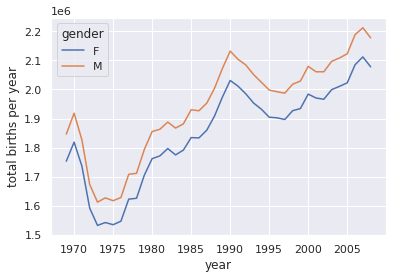

In [164]:
#number of births by year 

%matplotlib inline
import matplotlib.pyplot as plt
sns.set()

births.pivot_table('births', index = 'year', columns = 'gender', aggfunc='sum').plot()
plt.ylabel('total births per year');



In [170]:
#clean code, for use week births
quartiles = np.percentile(births['births'], [25, 50, 75])
mu = quartiles[1]
sig = 0.74 * (quartiles[2] - quartiles[0])

births = births.query('(births > @mu - 5 * @sig) % births < @mu +5 * @sig')

# set 'day' column to integer; it originally was a string due to nulls
births['day'] = births['day'].astype(int)

# create a datetime index from the year, month, day
births.index = pd.to_datetime(10000 *births.year + 100 * births.month + births.day, format = '%Y%m%d')

births['dayofweek'] = births.index.dayofweek

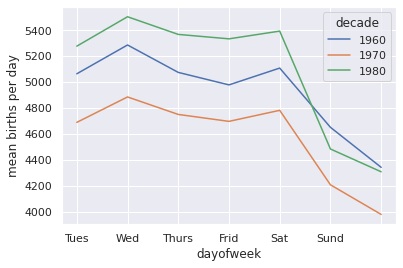

In [173]:
import matplotlib.pyplot as plt
import matplotlib as mpl

births.pivot_table('births', index = 'dayofweek', 
                   columns = 'decade', aggfunc = 'mean').plot()

plt.gca().set_xticklabels(['Mon', 'Tues', 'Wed', 'Thurs', 'Frid', 'Sat', 'Sund'])
plt.ylabel('mean births per day');
                   